In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import utils

from utils import local_data
from utils import window

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df_series = pd.read_pickle(os.path.join(local_data, "df_series_tec_re.pkl.xz"), compression='xz')
df_station = pd.read_pickle(os.path.join(local_data, 'df_station_sort_re.pkl'))

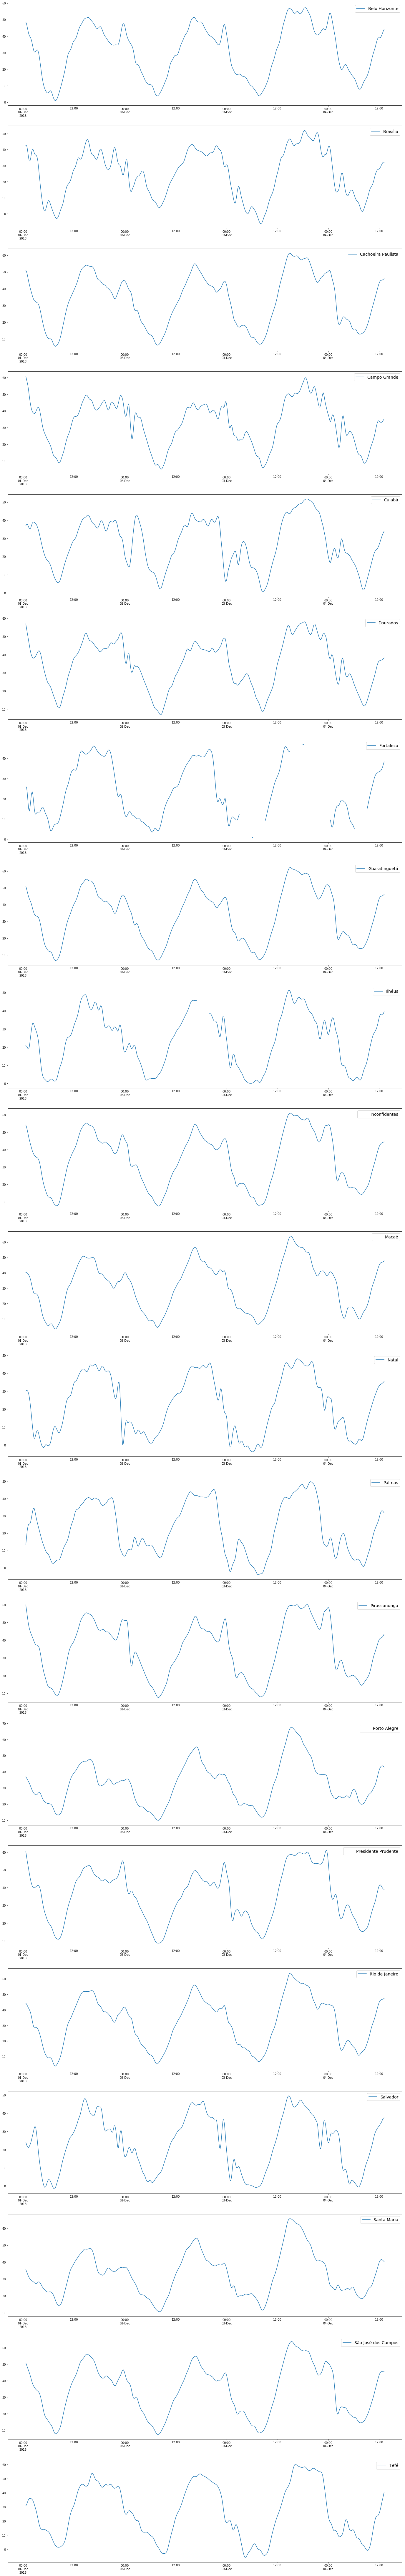

In [3]:
size = df_series.columns.size
fig, ax = plt.subplots(size, 1)
for idx, i in enumerate(df_series.columns):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series[i][0:512].plot(figsize=(24, 160), ax=ax[idx], label=name)
    ax[idx].legend(loc="upper right")

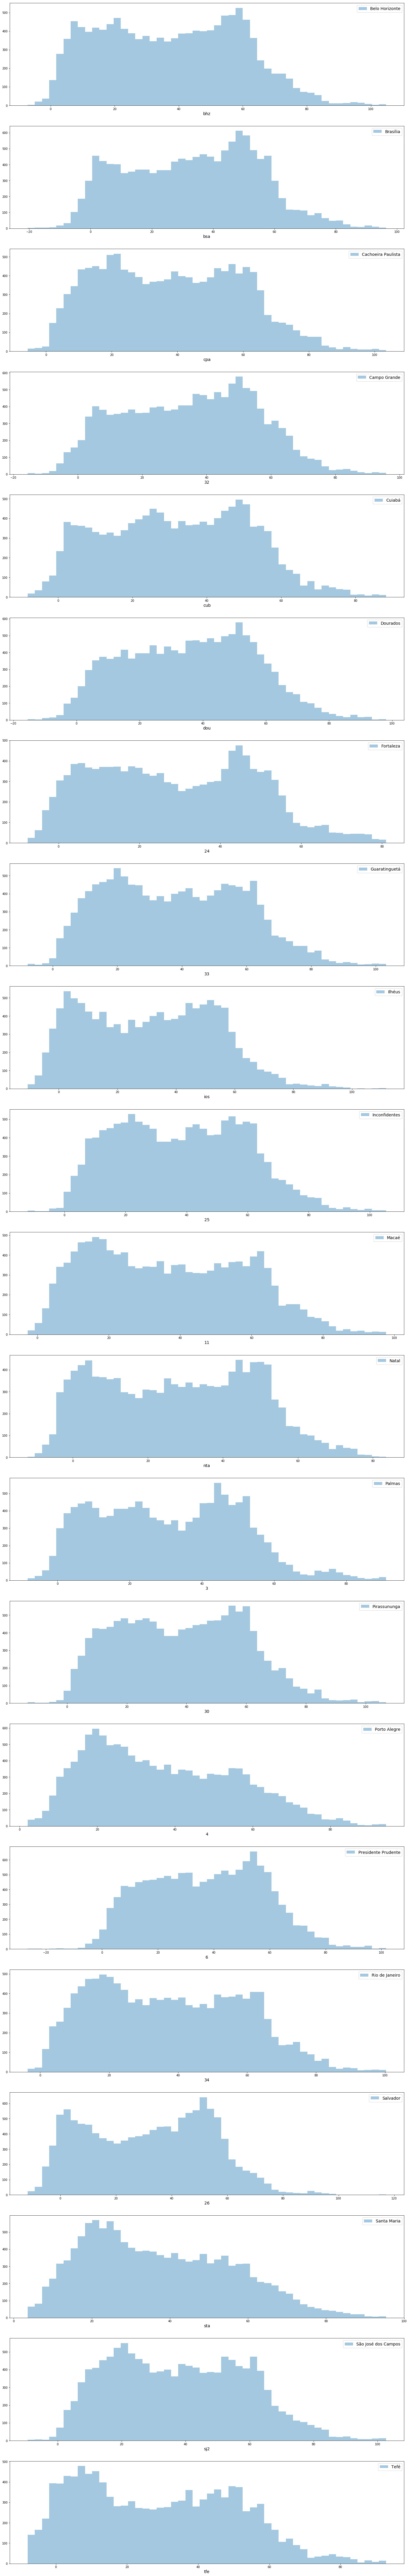

In [4]:
size = df_series.columns.size
fig, ax = plt.subplots(size, 1, figsize=(24, 160))
for idx, i in enumerate(df_series.columns):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    sns.distplot(df_series[i].dropna(), kde=False, ax=ax[idx], label=name, bins=50)
    ax[idx].legend(loc="upper right")